In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def _load_data(base_model="RandomForestClassifier", dataset="electricity"):
    filename = f"results_importances/base_model: {base_model} - dataset: {dataset}.json"
    with open(filename) as json_file:
        data = json.load(json_file)
    return data

def _get_mean_importances(data: dict):
    final_df = pd.DataFrame(columns=["feature", "importance", "type", "meta_label"])
    for metric, value in data.items():
        for drift_flag, importances in value.items():
            importances_df = pd.DataFrame()
            importances_df["importance"] = pd.DataFrame(data[metric][drift_flag]).mean()
            importances_df["type"], importances_df["meta_label"] = drift_flag, metric
            importances_df = importances_df.reset_index().rename(columns={"index": "feature"})
            final_df = pd.concat([final_df, importances_df])
    return final_df

def _plot_results(data: dict, final_df: pd.DataFrame, n_feat_to_plot: int=20, figsize=(25, 30)):
    metrics = list(data.keys())
    drift_flags = list(data['kappa'].keys())
    plt.figure(figsize=figsize)

    for metric_idx, metric in enumerate(metrics):
        for drift_idx, drift_flag in enumerate(drift_flags):
            plt.subplot(len(metrics), len(drift_flags), metric_idx * 2 + drift_idx + 1)
            plt.title(f"{metric} - {drift_flag}")
            plot_df = final_df[(final_df["type"] == drift_flag) & (final_df["meta_label"] == metric)]
            plot_df = plot_df.sort_values(by=["importance"]).tail(n_feat_to_plot)
            plt.barh(plot_df["feature"], plot_df["importance"])

def run(base_model: str="RandomForestClassifier", dataset: str="electricity", n_feat_to_plot: int=20, figsize: tuple=(25, 30)):
    data = _load_data(base_model, dataset)
    imp_df = _get_mean_importances(data)
    _plot_results(data=data, final_df=imp_df, n_feat_to_plot=n_feat_to_plot, figsize=figsize)

# Base models

## Decision tree

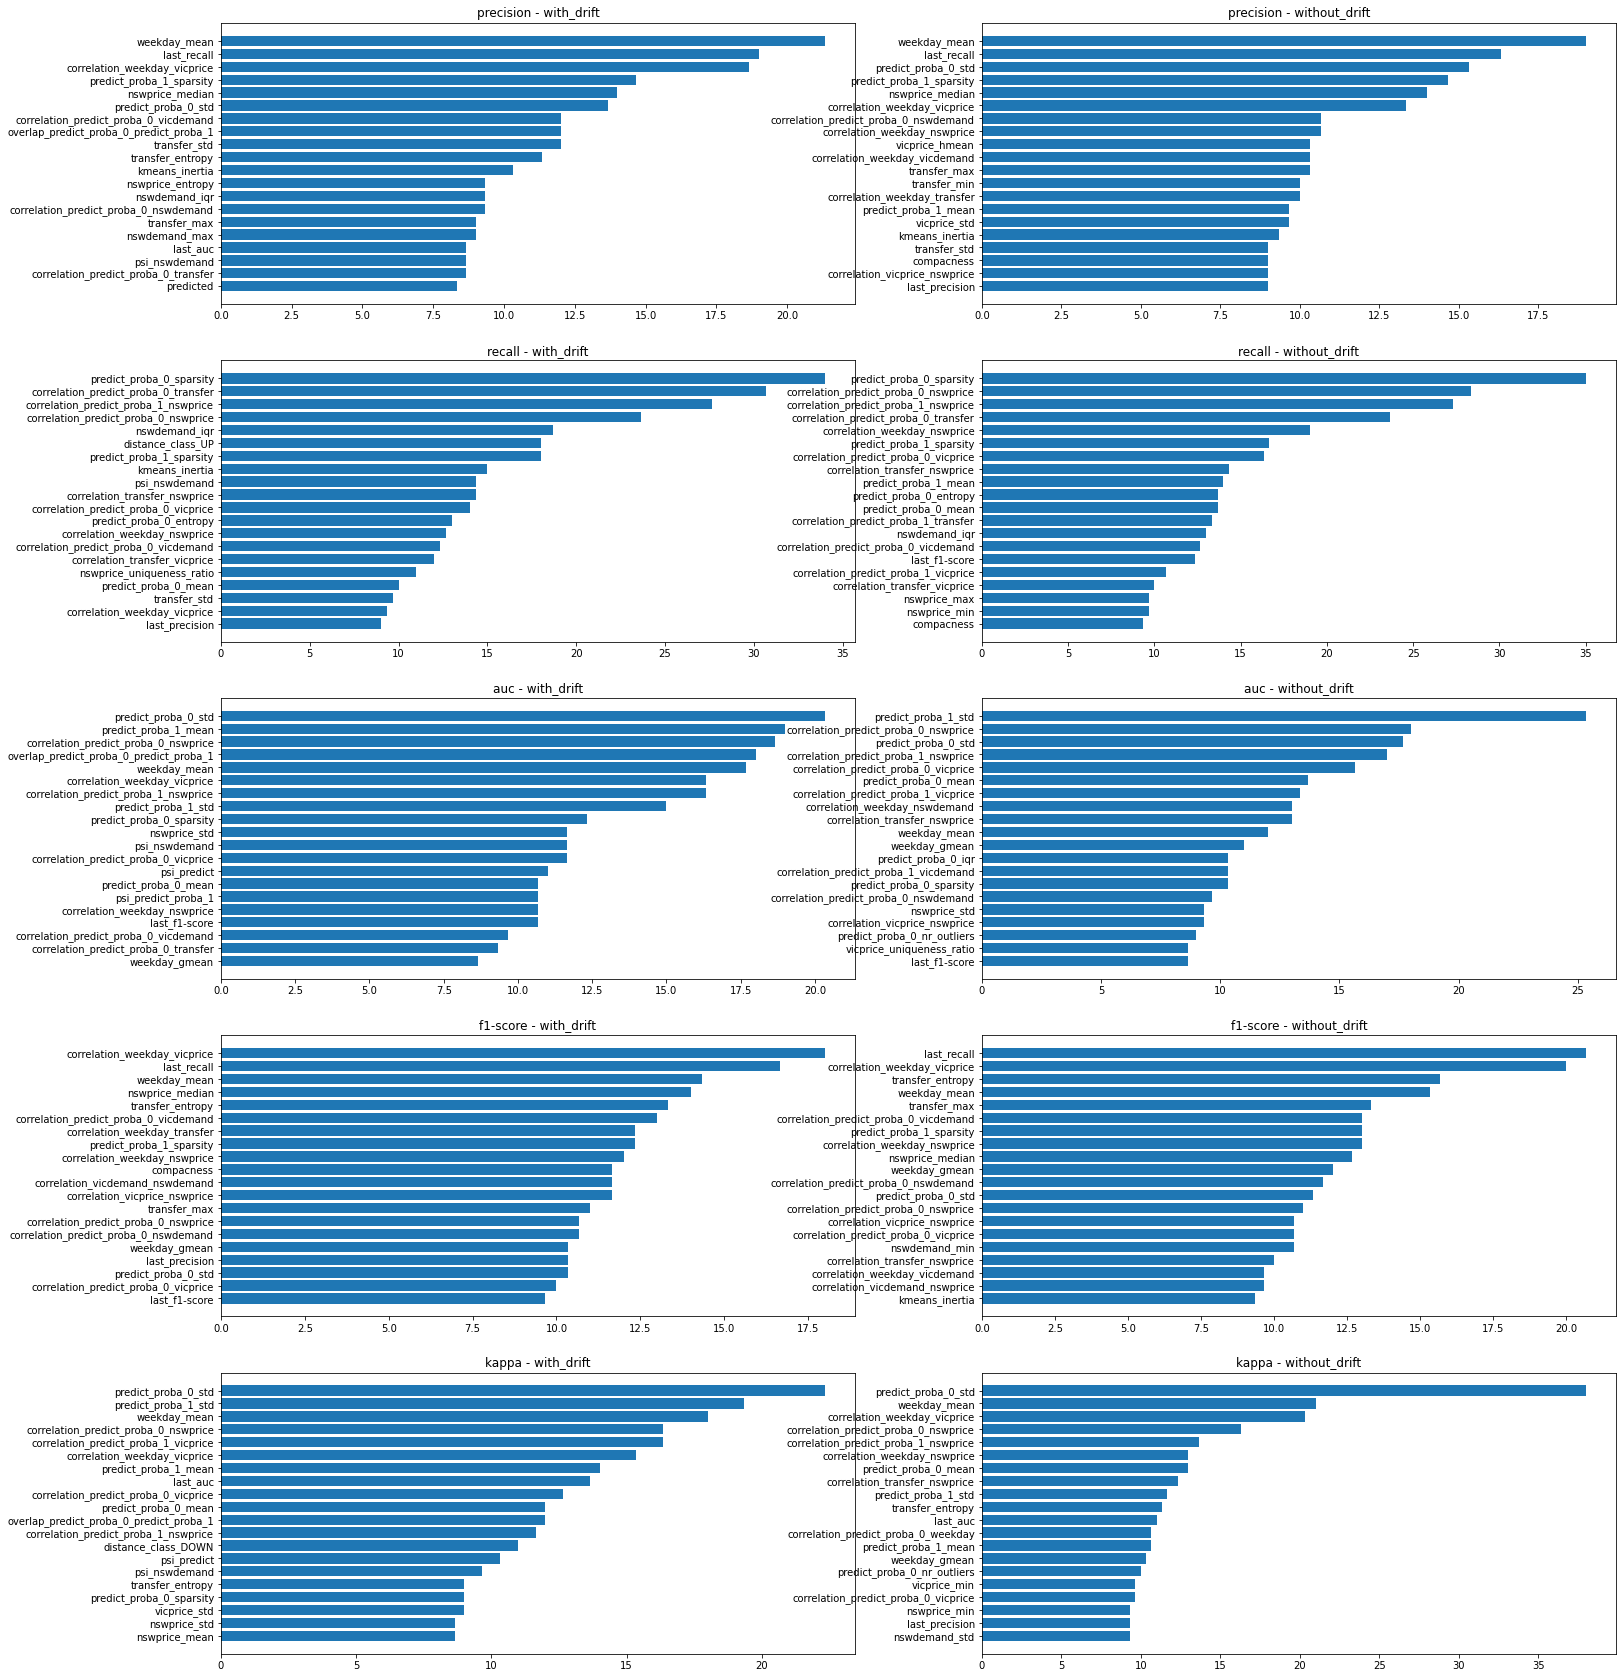

In [14]:
run(base_model="DecisionTreeClassifier", dataset="electricity")

## SVM

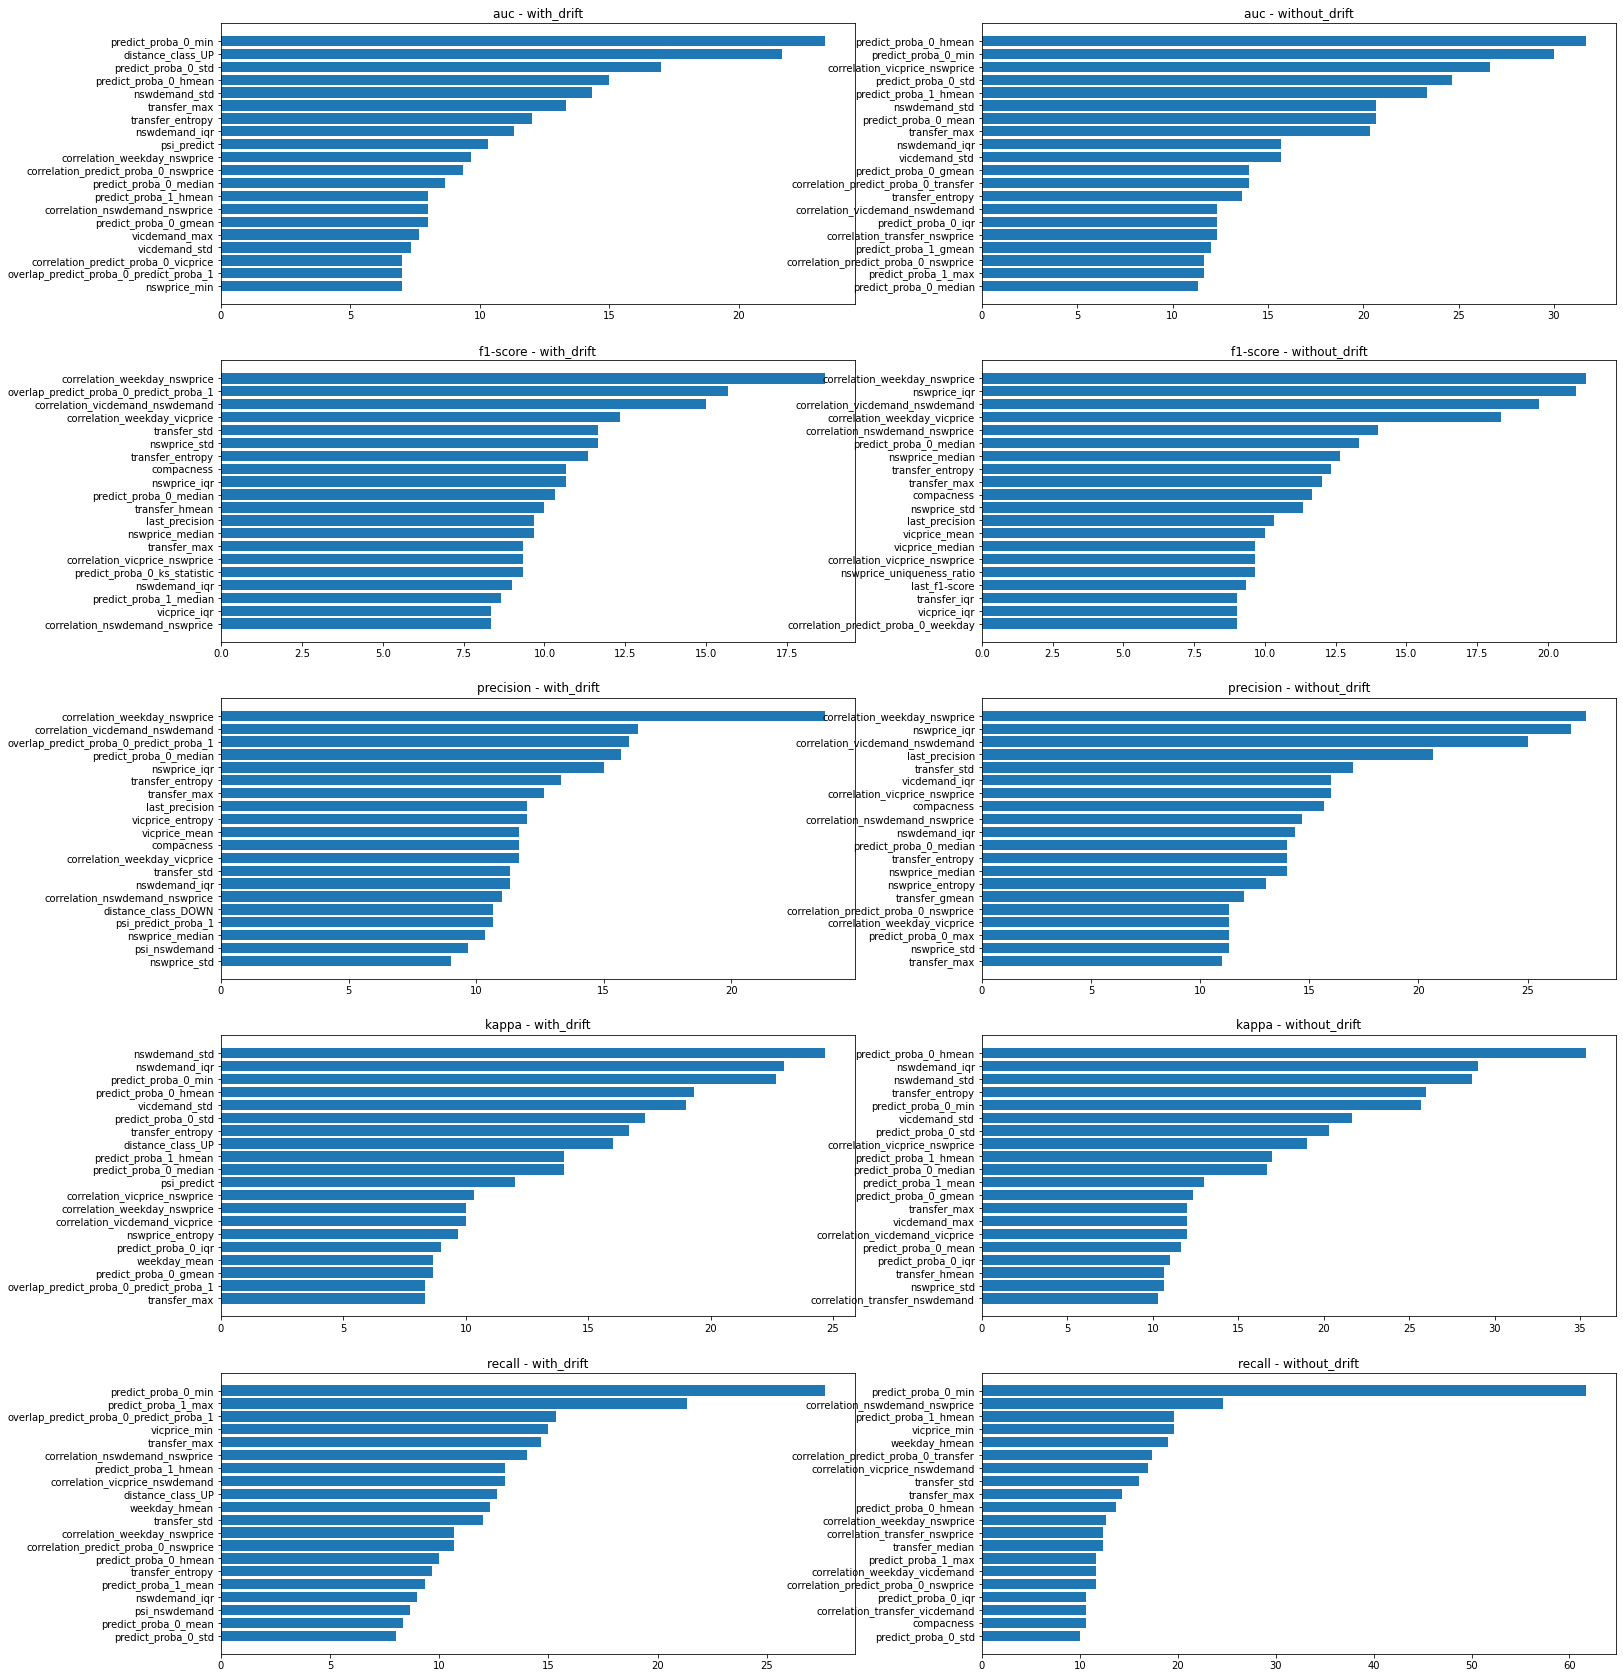

In [15]:
run(base_model="SVC", dataset="electricity")

## LogisticRegression

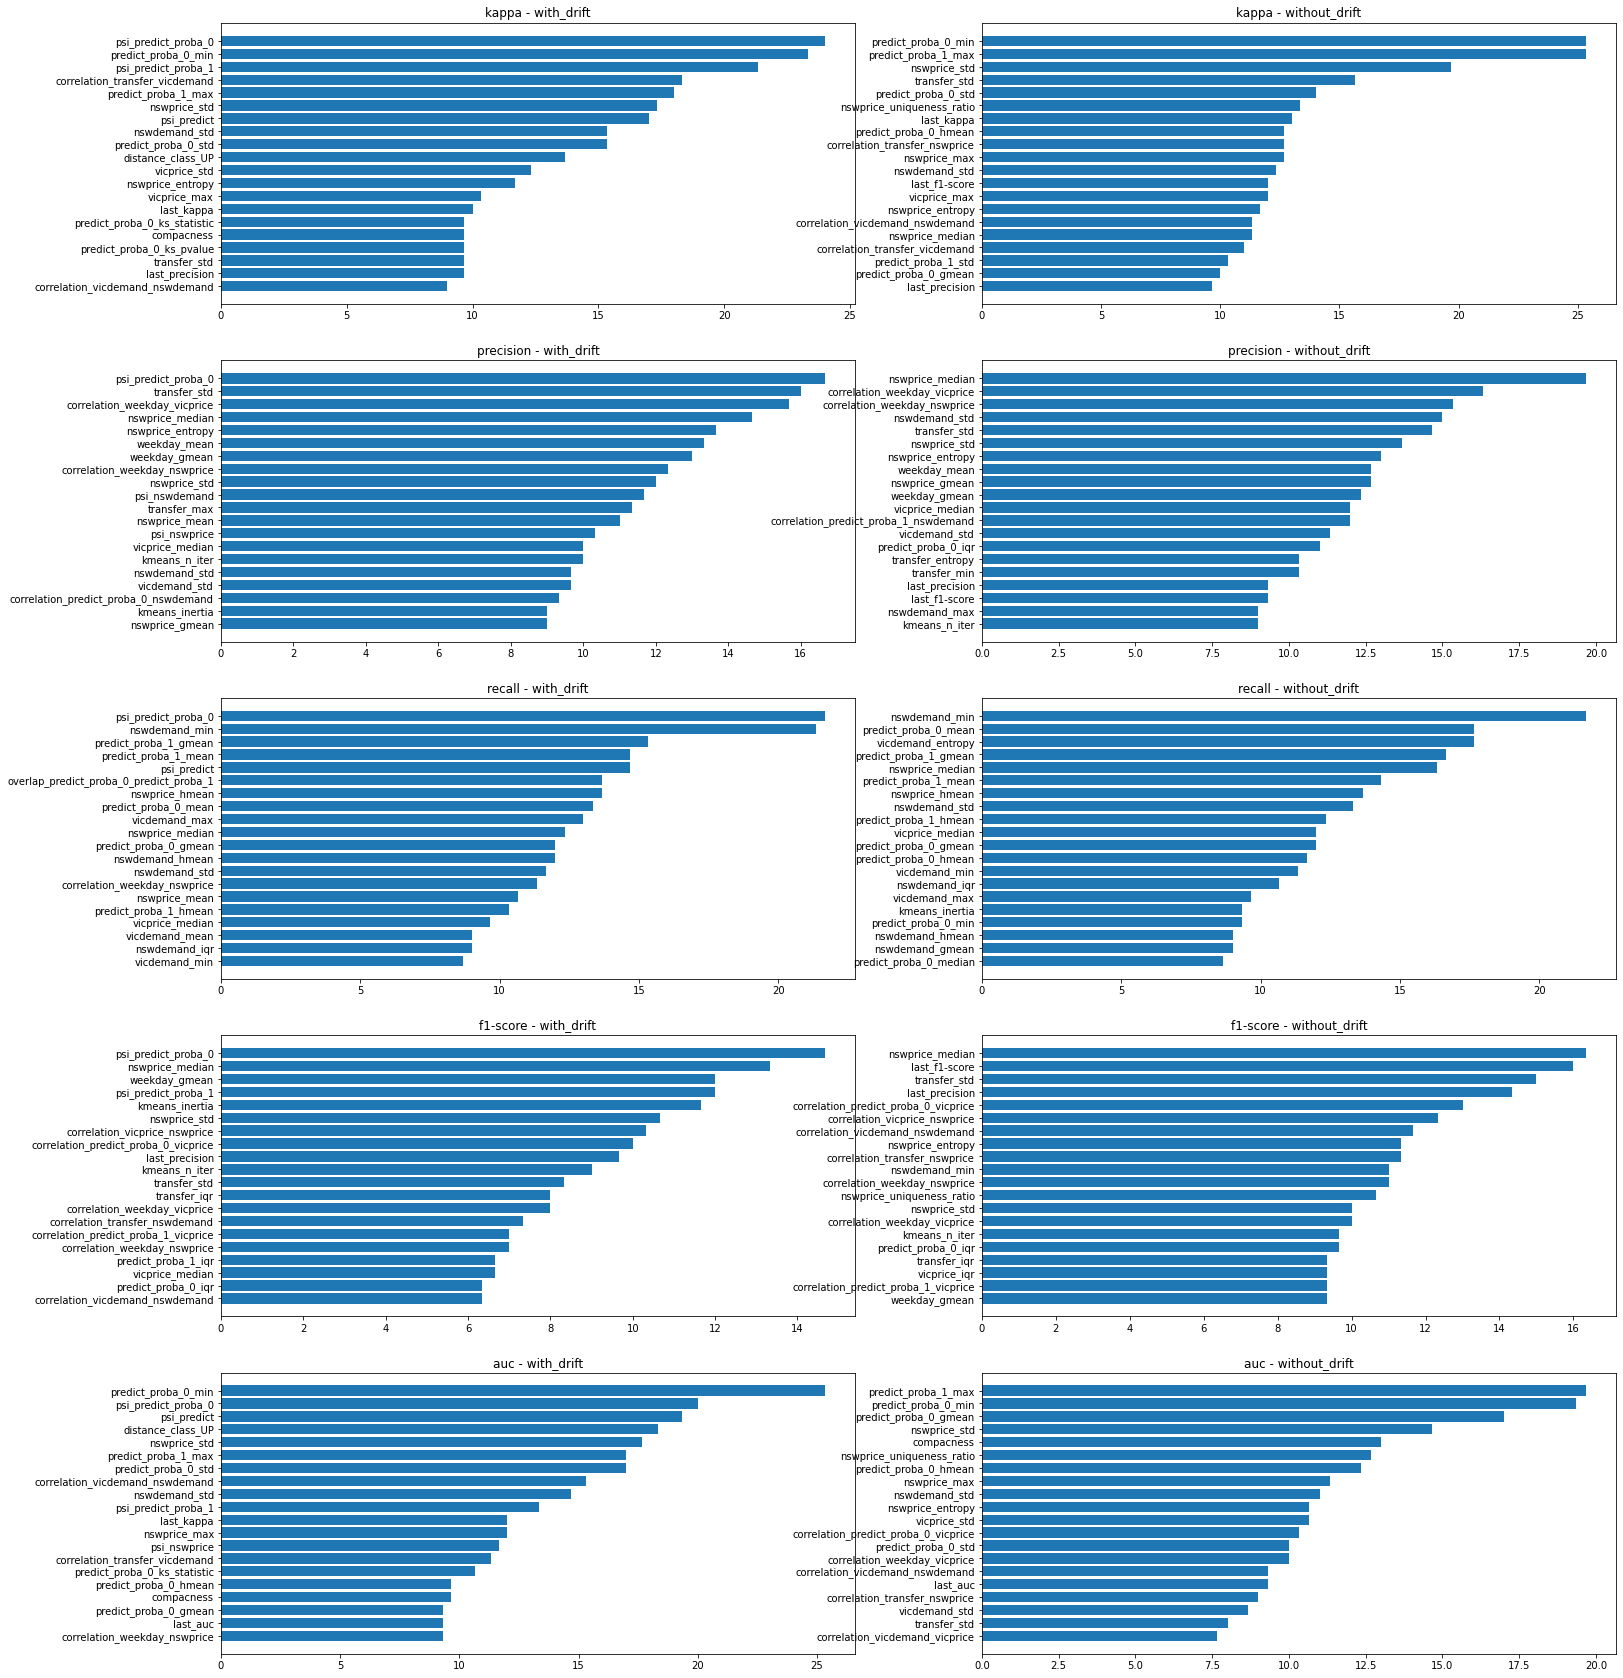

In [16]:
run(base_model="LogisticRegression", dataset="electricity")

# Datasets

# Electricity

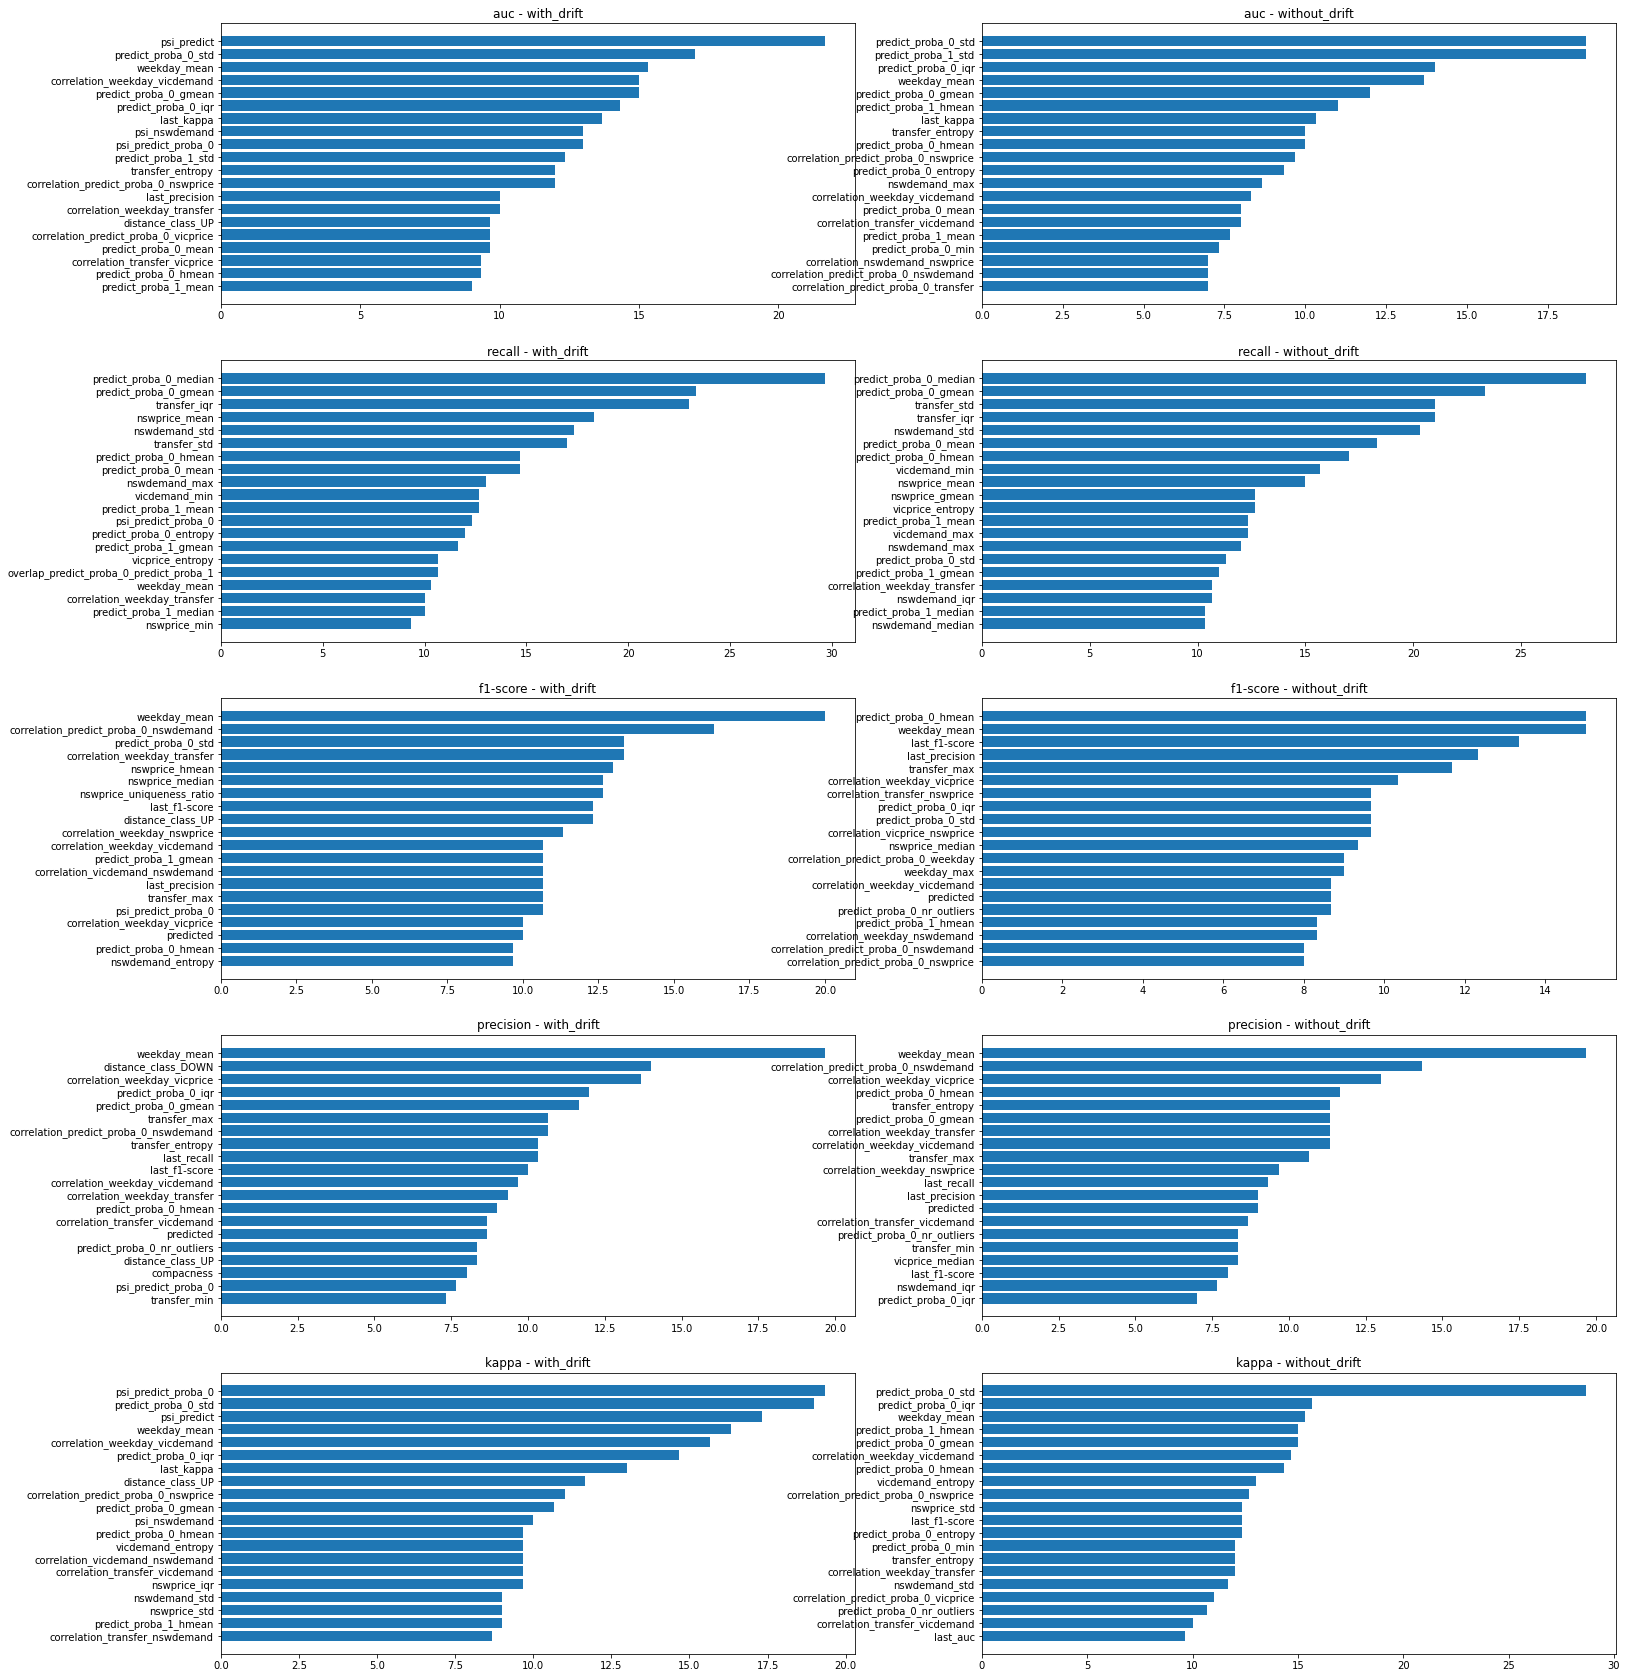

In [4]:
run(base_model="RandomForestClassifier", dataset="electricity")

# Airlines

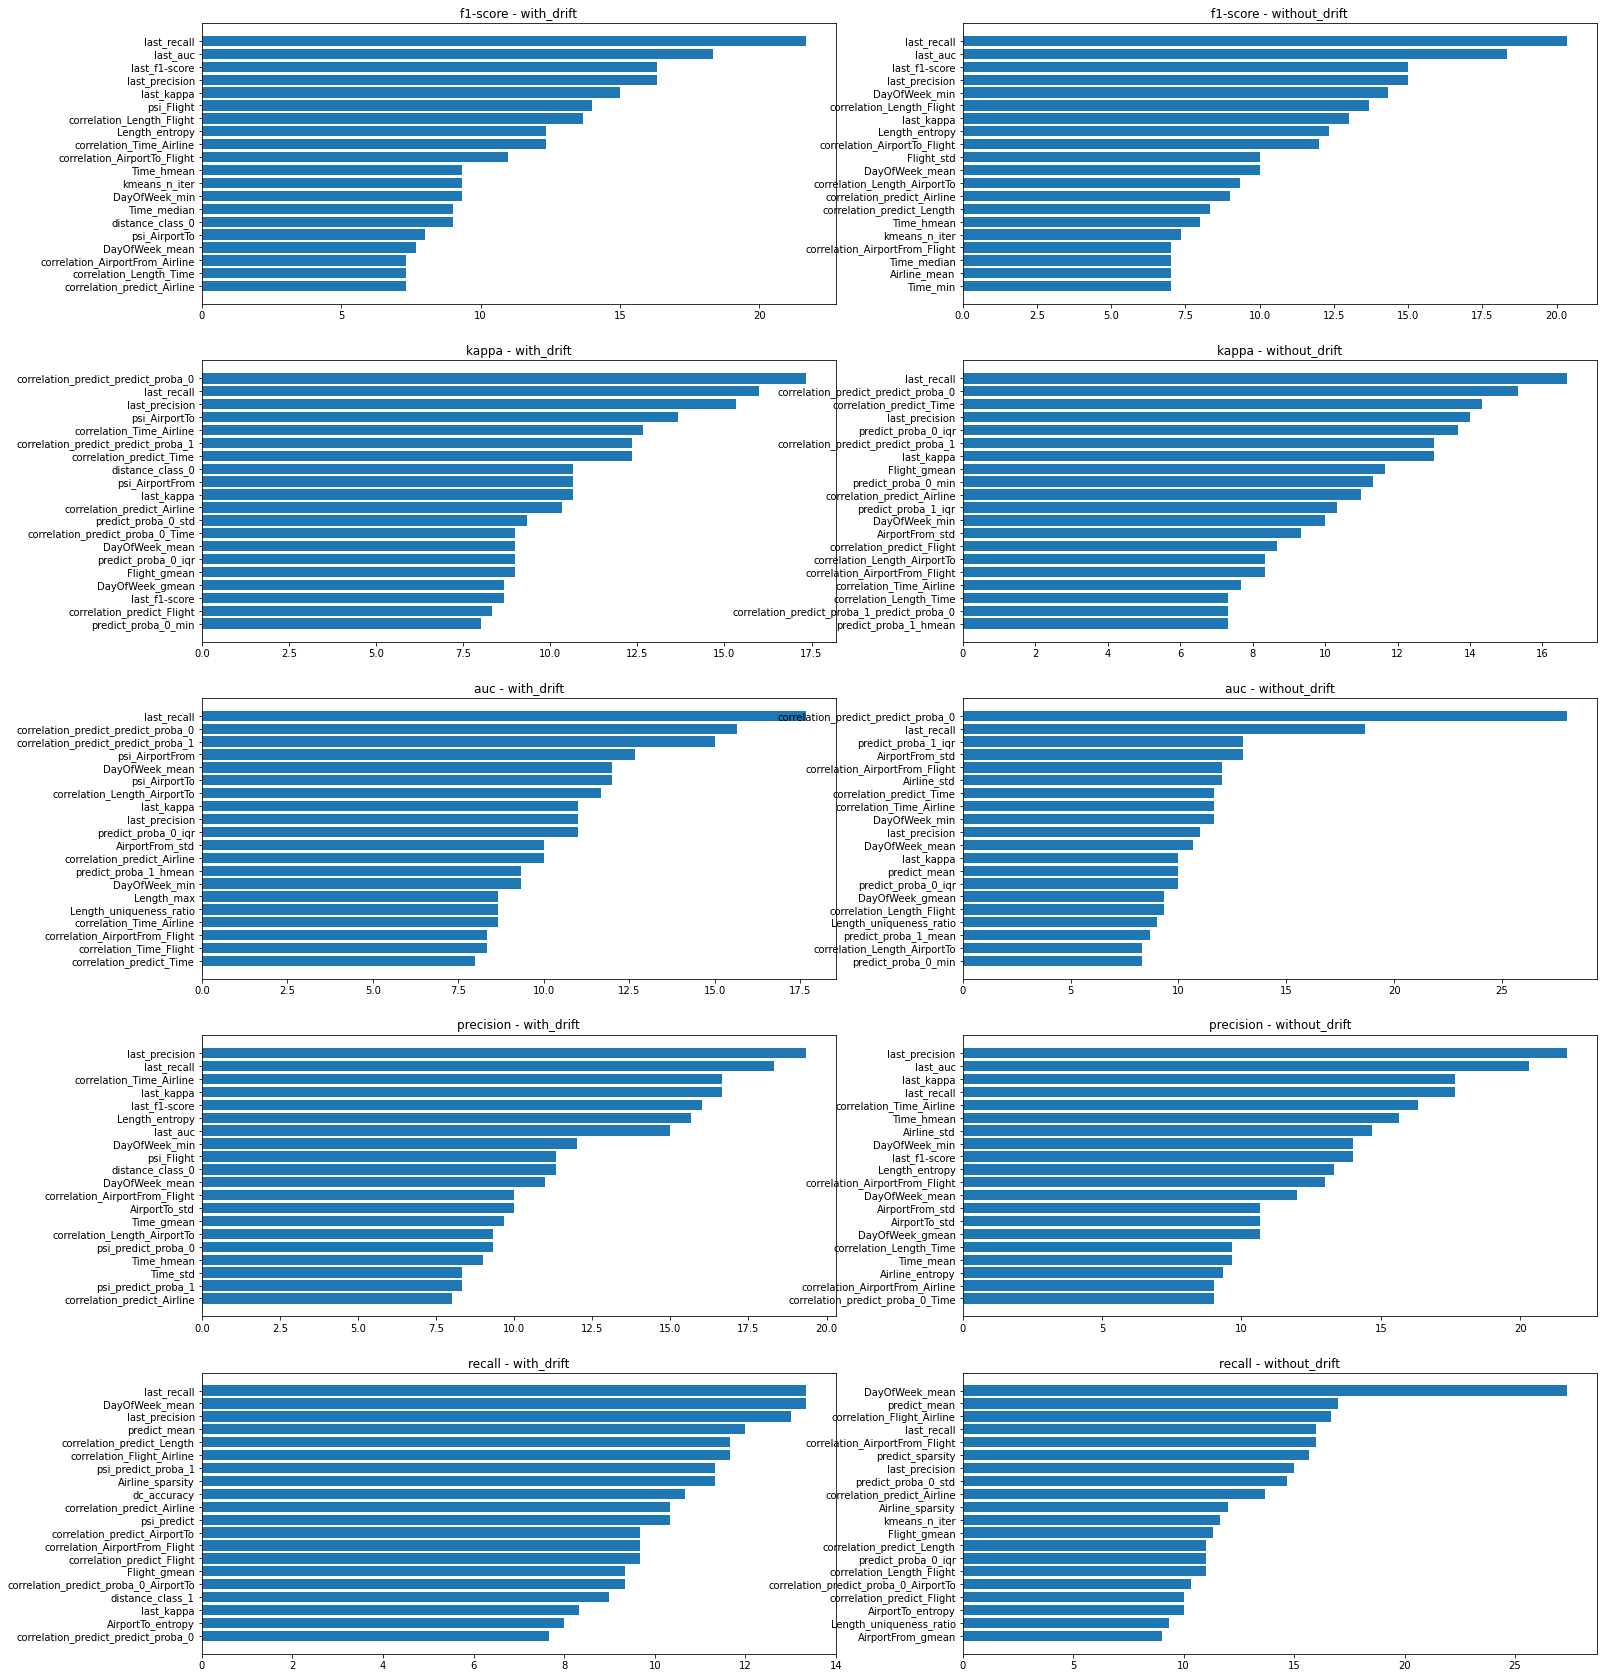

In [5]:
run(base_model="RandomForestClassifier", dataset="airlines")

# powersupply

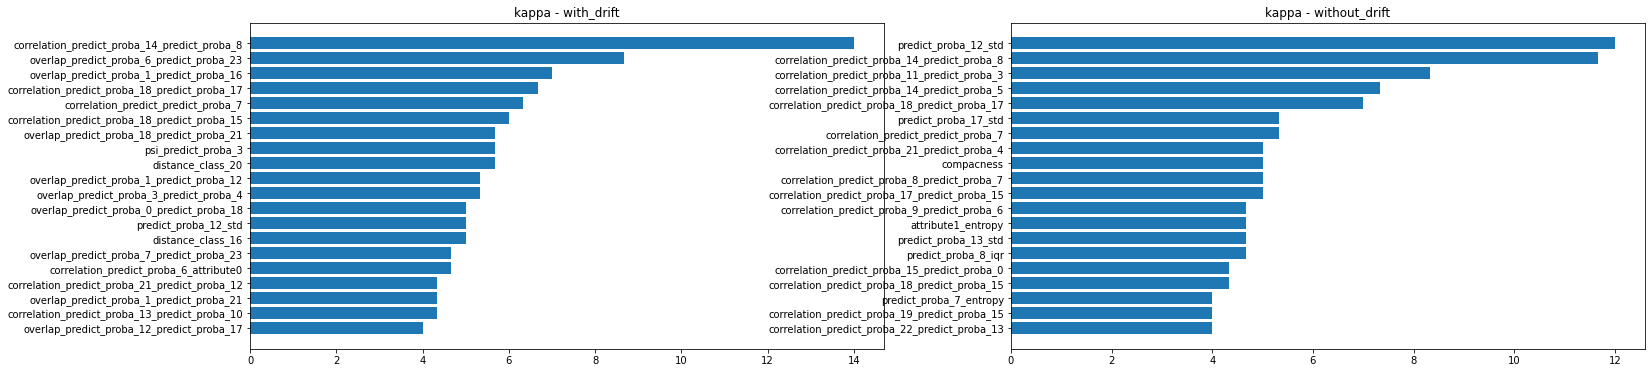

In [12]:
run(base_model="RandomForestClassifier", dataset="powersupply", figsize=(25, 6))

# rialto

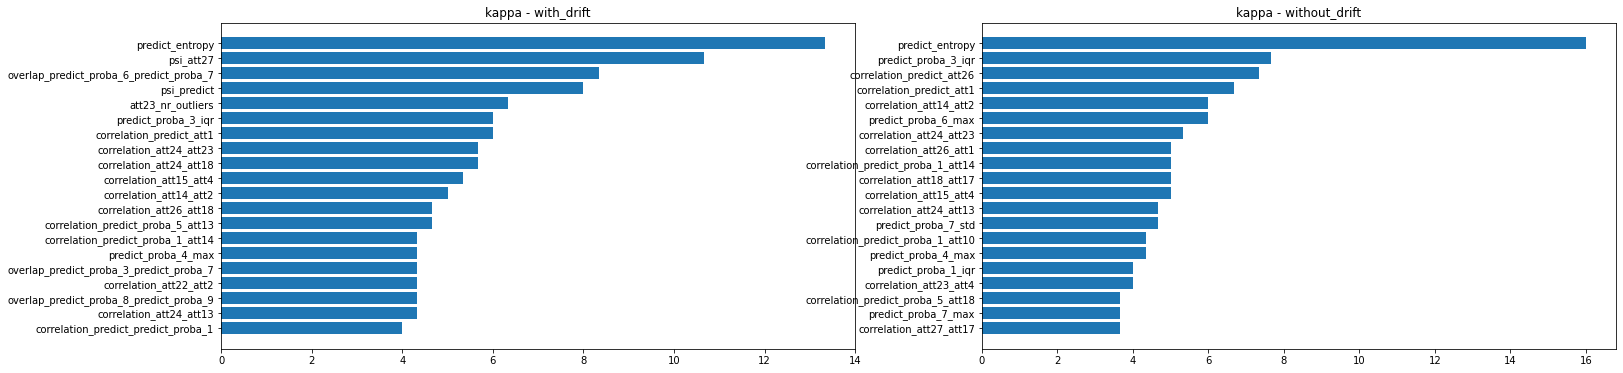

In [13]:
run(base_model="RandomForestClassifier", dataset="rialto", figsize=(25, 6))